In [32]:
import tensorflow as tf
import numpy as np
import random as rnd

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

# Ejemplo Perceptrón con sigmoide (regresión logística)

In [34]:
X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y=np.asarray([[0],[0],[0],[1]])

Declaracion de variables

In [35]:
input_size=2
output_layer_size=1
#Los placeholders son para los datos de entrada
x = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_layer_size]) #la y real
#La variables para lo que se va a ir calculando y modificando en el camino
W_layer1=tf.Variable(tf.random_uniform([input_size,output_layer_size], -1, 1), name="W_layer1")
b_layer1 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer1")


Operaciones, grafo

In [36]:
y = tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1) #la de nuestra
lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadratico
#lossfn= tf.reduce_mean(( (y_ * tf.log(y)) +  
 # ((1 - y_) * tf.log(1.0 - y)) ) * -1) # cross entropy
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

In [37]:
init = tf.initialize_all_variables()
sess = tf.Session() # tipo de sesion, puede ser interactiva


Instructions for updating:
Use `tf.global_variables_initializer` instead.


Correr programa

In [38]:
sess.run(init)
for i in range(5000):
  sess.run(train_step, feed_dict={x: X, y_: Y})

In [39]:
#imprimir alguna variable
print(sess.run(y, feed_dict={x:[[0.8,0.5]]}))
print(sess.run(W_layer1, feed_dict={x: X, y_: Y}))

[[ 0.34098524]]
[[ 2.67373204]
 [ 2.67322111]]


Cuantificar Error

In [40]:
correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: X, y_: Y})) # las corremos

1.0


Visualizar Barrera de Decisión. Sacar las w del grafo de Tensorflow

In [41]:
w=[sess.run(b_layer1, feed_dict={x: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer1, feed_dict={x: X, y_: Y})]

Donde vale $X_1$ cero y donde $X_2$ vale cero? $w_0+w_1X_1+w_2X_2 =0$. $X_1=\frac{-w_2X_2-w_0}{w_1}$ y $X_2=\frac{-w_1X_1-w_0}{w_2}$

Buscamos una recta que pasa por $\left(0,\frac{-w_0}{w_2}\right)$ y $\left(\frac{-w_0}{w_1},0\right)$, la pendiente es $\frac{\frac{-w_0}{w_2}-0}{0-\frac{-w_0}{w_1}}=\frac{-w_1}{w_2}$ 
La ordenada $y-y_1=m(x-x_1)$ es $y-\frac{-w_0}{w_2}=\frac{-w_1}{w_2} x$, $y=\frac{-w_1}{w_2} x+\frac{-w_0}{w_2}$


In [42]:
m=((w[0]/w[2]))/((-w[0]/w[1]))
print -w[0]/w[1], -w[0]/w[2], m

1.54634 1.54664 -1.00019


(-5.2, 5.2)

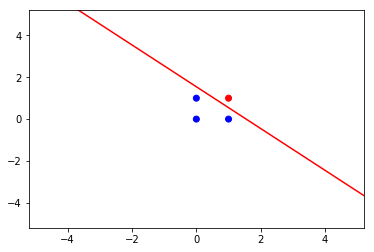

In [43]:
plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y])
x2 = np.linspace(-5.2,5.2,100) # 100 numeros espaciados
plt.plot(x2,-w[0]/w[2]+m*x2,color='red')
plt.ylim([-5.2,5.2])
plt.xlim([-5.2,5.2])

In [44]:
sess.close()

In [45]:
# Ejemplo XOR function
X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y=np.asarray([[0],[1],[1],[0]])

In [46]:
input_size_layer1=2
number_hidden_nodes = 2
#Los placeholders son para los datos de entrada
x = tf.placeholder(tf.float32, [None, input_size_layer1])
y_ = tf.placeholder(tf.float32, [None, 1]) #la y real
#La variables para lo que se va a ir calculando y modificando en el camino
W=tf.Variable(tf.random_uniform([input_size_layer1,2], -1, 1), name="W_layer1")
b = tf.Variable(tf.zeros([2]))
hidden_layer= tf.nn.sigmoid(tf.matmul(x,W)+b) 

In [47]:
W2=tf.Variable(tf.random_uniform([2,1], -1, 1), name="W_layer2")
b2 = tf.Variable(tf.zeros([1]))
out_put_layer = tf.nn.sigmoid(tf.matmul(hidden_layer,W2)+b2) 
lossfn = tf.reduce_mean(tf.reduce_sum((y_-out_put_layer)**2))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

In [48]:
init = tf.global_variables_initializer()
sess = tf.Session() # tipo de sesion, puede ser interactiva

In [49]:
sess.run(init)
for i in range(50000):
  sess.run(train_step, feed_dict={x: X, y_: Y})

In [50]:
correct_prediction = tf.equal(tf.round(out_put_layer),y_) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: X, y_: Y})) # las corremos

1.0


In [89]:
sess.close()

In [90]:
#ahora vamos a hacer la red neuronal para el circulo

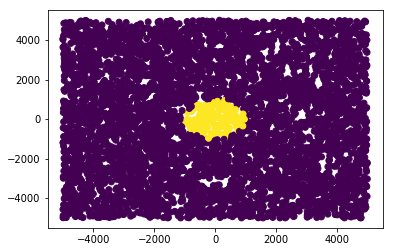

In [91]:
radius_of_circle = 1000
x_center = 5
y_center = 5
n = 5000
X = np.asarray([rnd.randint(-n,n) for i in range(n*2)]).reshape(n,2)
Y = np.array([[(1 if ((X[i][0]-x_center)**2)+((X[i][1]-y_center)**2)<=(radius_of_circle**2) else 0)] for i in range(len(X))])
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [92]:
def NNFun(number_hidden_nodes, lambd):
    radius_of_circle = 1000
    x_center = 5
    y_center = 5
    n = 5000
    X = np.asarray([rnd.randint(-n,n) for i in range(n*2)]).reshape(n,2)
    Y = np.array([[(1 if ((X[i][0]-x_center)**2)+((X[i][1]-y_center)**2)<=(radius_of_circle**2) else 0)] for i in range(len(X))])
    input_size_layer1=2
    output_size_layer1 = 1
    #Los placeholders son para los datos de entrada
    x = tf.placeholder(tf.float32, [None, input_size_layer1])
    y_ = tf.placeholder(tf.float32, [None, output_size_layer1]) #la y real
    
    #La variables para lo que se va a ir calculando y modificando en el camino
    W=tf.Variable(tf.random_uniform([input_size_layer1,number_hidden_nodes], -1, 1), name="W_layer1")
    b = tf.Variable(tf.zeros([number_hidden_nodes]), name = "b_layer1")
    
    hidden_layer= tf.nn.sigmoid(tf.matmul(x,W)+b) 
    
    W2=tf.Variable(tf.random_uniform([number_hidden_nodes,output_size_layer1], -1, 1), name="W_layer2")
    b2 = tf.Variable(tf.zeros([output_size_layer1]), name = "b_layer2")
    
    out_put_layer = tf.nn.sigmoid(tf.matmul(hidden_layer,W2)+b2) 
    
    lossfn = tf.reduce_mean(tf.reduce_sum((y_-out_put_layer)**2))
    train_step = tf.train.GradientDescentOptimizer(lambd).minimize(lossfn)
    
    init = tf.global_variables_initializer()
    sess = tf.Session() # tipo de sesion, puede ser interactiva
    sess.run(init)
    
    for i in range(5000):
      sess.run(train_step, feed_dict={x: X, y_: Y})
    
    correct_prediction = tf.equal(tf.round(out_put_layer),y_) # aca estams definiendo otras operacioes
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print(sess.run(accuracy, feed_dict={x: X, y_: Y})) # las corremos
    sess.close()

In [119]:
Error = np.array([NNFun(i,0.05) for i in range(1,20)])

0.9664
0.9678
0.9602
0.9692
0.966
0.9696
0.9678
0.9676
0.9676
0.9716
0.9686
0.9694
0.9662
0.9674
0.9748
0.9696
0.9682
0.9646
0.9682
